In [56]:
# !pip install --upgrade pandas-datareader
# !pip install --upgrade pandas
# !pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data

In [57]:
 df = yf.download("AAPL", start="2010-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [58]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515211,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400


In [59]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515211,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800


In [60]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.929993,76960600


In [61]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515211,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800


In [62]:
df = df.drop(['Date', "Adj Close"], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [63]:
#Our web application will be based on close price

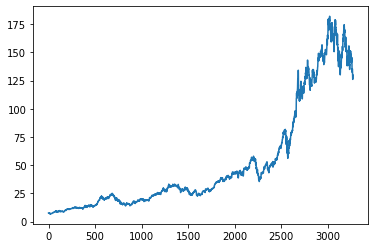

In [64]:
plt.plot(df['Close'])

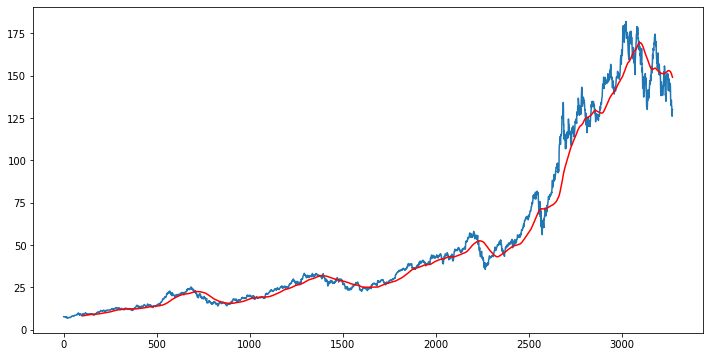

In [65]:
# Moving Average of 100 days
ma100 = df['Close'].rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')

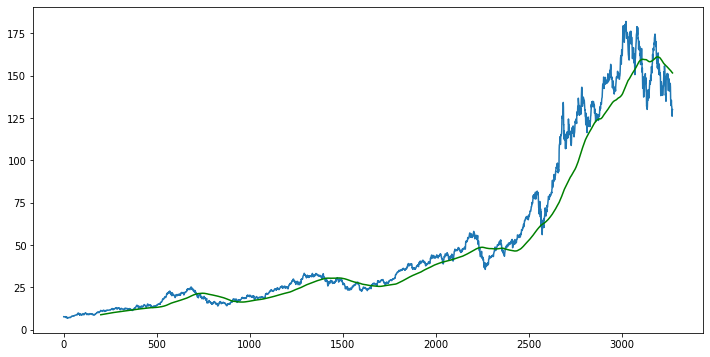

In [66]:
# Moving average of 200 days
ma200 = df['Close'].rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma200,'g')

In [67]:
df.shape

(3272, 5)

In [68]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [69]:
#Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [70]:
data_training.shape

(2290, 1)

In [71]:
data_testing.shape

(982, 1)

In [72]:
df.shape

(3272, 5)

In [73]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [74]:
data_testing.tail()

,Close
3267,131.860001
3268,130.029999
3269,126.040001
3270,129.610001
3271,129.929993


In [75]:
#Scaling down the data for LSTM model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [76]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [77]:
# Splitting int train and test
X_train = []
y_train = []
# Price on 11th day is dependent on previoud day price. Steps = 100 daya here
# For first 100 days will be feature (X_train) and next day will be y_train
# After each step steps, it will forget  one data
# (34 36 33 40 39 38 37 42 44 38) --X_train (11th day)--y_train

In [78]:
for i in range(100, data_training.shape[0]):
  X_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [79]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [80]:
X_train.shape

(2190, 100, 1)

In [81]:
# ML model creation
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [82]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [85]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 19s 215ms/step - loss: 0.0331
Epoch 2/50
69/69 [==============================] - 15s 212ms/step - loss: 0.0072
Epoch 3/50
69/69 [==============================] - 15s 212ms/step - loss: 0.0060
Epoch 4/50
69/69 [==============================] - 15s 211ms/step - loss: 0.0052
Epoch 5/50
69/69 [==============================] - 15s 214ms/step - loss: 0.0054
Epoch 6/50
69/69 [==============================] - 15s 211ms/step - loss: 0.0046
Epoch 7/50
69/69 [==============================] - 14s 208ms/step - loss: 0.0044
Epoch 8/50
69/69 [==============================] - 15s 219ms/step - loss: 0.0046
Epoch 9/50
69/69 [==============================] - 15s 219ms/step - loss: 0.0043
Epoch 10/50
69/69 [==============================] - 15s 217ms/step - loss: 0.0042
Epoch 11/50
69/69 [==============================] - 15s 215ms/step - loss: 0.0039
Epoch 12/50
69/69 [==============================] - 14s 208ms/step - loss: 0.0033
Epoch 13/50
6

In [87]:
model.save('keras_model.h5')

In [89]:
#We have to append last 100 days data from the training dataset to predict the value for testing data
# Because for index 2290, no previous data is available
past_100_days = data_training.tail(100)

In [90]:
final_df = past_100_days.append(data_testing, ignore_index = True)

<ipython-input-90-1e7e7f089a7f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [92]:
# Scaline down the test data
input_data = scaler.transform(final_df)

In [95]:
input_data.shape

(1082, 1)

In [96]:
X_test = []
y_test = [] 

In [97]:
for i in range(100, input_data.shape[0]):
  X_test.append(data_training_array[i-100:i])
  y_test.append(data_training_array[i,0])

In [98]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [102]:
X_test.shape

(982, 100, 1)

In [103]:
# Making predictions
y_pred = model.predict(X_test)

31/31 [==============================] - 2s 58ms/step


In [104]:
y_pred.shape

(982, 1)

In [105]:
y_test.shape

(982,)

In [107]:
# Scaling up the value because it was scaled down
scale_factor = 1/scaler.scale_
y_pred = y_pred *scale_factor
y_test = y_test *scale_factor

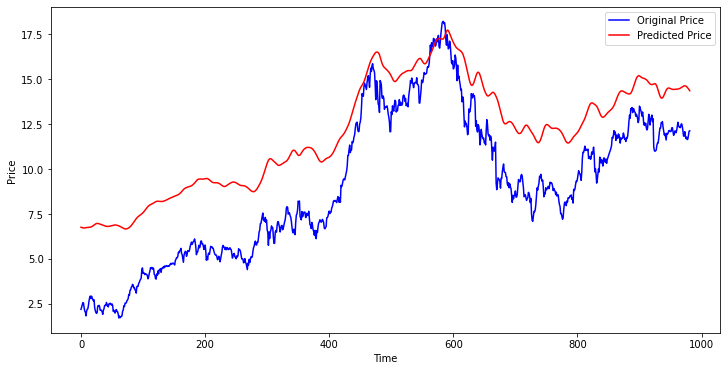

In [112]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()